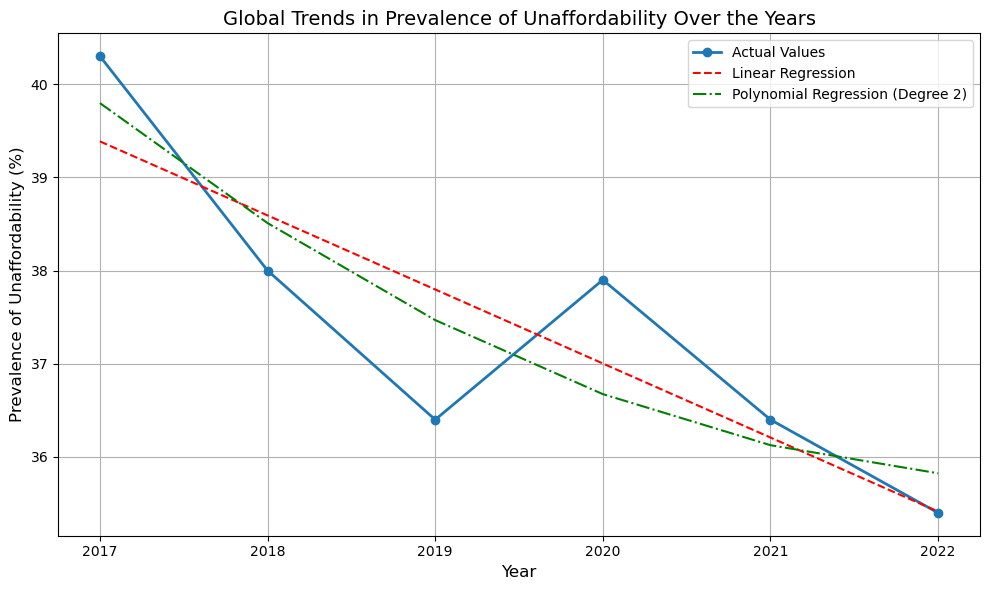

Linear Regression: Intercept = 1641.46, Slope = -0.7942857142857143
Polynomial Regression Coefficients: [ 0.00000000e+00 -4.98456786e+02  1.23214286e-01]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the dataset
affordability_data_path = r"C:\Users\bgane\Downloads\affordablity over years.csv"  
affordability_data = pd.read_csv(affordability_data_path)

# Filter data for global trends of unaffordability over the years
global_affordability_trends = affordability_data[affordability_data['Area'] == 'World']

# Prepare data for regression
X = global_affordability_trends['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = global_affordability_trends['Value'].values  # Dependent variable (Prevalence of Unaffordability)

# Perform linear regression
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_predicted_values = linear_model.predict(X)

# Perform polynomial regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_predicted_values = poly_model.predict(X_poly)

# Plot the actual data and regression lines
plt.figure(figsize=(10, 6))
plt.plot(global_affordability_trends['Year'], global_affordability_trends['Value'], 
         marker='o', linestyle='-', linewidth=2, label="Actual Values")
plt.plot(global_affordability_trends['Year'], linear_predicted_values, color='red', linestyle='--', label="Linear Regression")
plt.plot(global_affordability_trends['Year'], poly_predicted_values, color='green', linestyle='-.', label="Polynomial Regression (Degree 2)")
plt.title("Global Trends in Prevalence of Unaffordability Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Prevalence of Unaffordability (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression details
print(f"Linear Regression: Intercept = {linear_model.intercept_}, Slope = {linear_model.coef_[0]}")
print(f"Polynomial Regression Coefficients: {poly_model.coef_}")
